# Radius Valley KDE Plots
This Python notebook uses the results of the Bayesian method used to determine the slope and intercept for the 2D power law equation in **RV_Slope_{x-axis}** notebooks, where **{x-axis}** can be **Period**, **Flux** or **Mass**. These results are overlayed on the KDE contour plot of the sample planets for each horizontal parameter (i.e., orbital period, insolation flux or stellar mass). Theoretical predictions and observational results for the slopes are also shown on these plots as a comparison with those data. This Python notebook is used for step 6 of the Radius Valley slope estimation process and requires the **RV_Planets_Final.csv** file.


In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

C:\Users\Dajordan78\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
planets = pd.read_csv('RV_Planets_Final.csv')
planets.shape

(1923, 4)

In [3]:
planets.Ms.describe()

count    1923.000000
mean        0.906609
std         0.222424
min         0.090000
25%         0.800000
50%         0.930000
75%         1.040000
max         1.890000
Name: Ms, dtype: float64

In [4]:
radius = planets.Rp
period = planets.Sp
P_nan_count = planets['P'].isna().sum()
F_nan_count = planets['Sp'].isna().sum()
M_nan_count = planets['Ms'].isna().sum()
print(P_nan_count)
print(F_nan_count)
print(M_nan_count)

0
0
0


## Rp vs. P - KDE & Radius Valley Slope

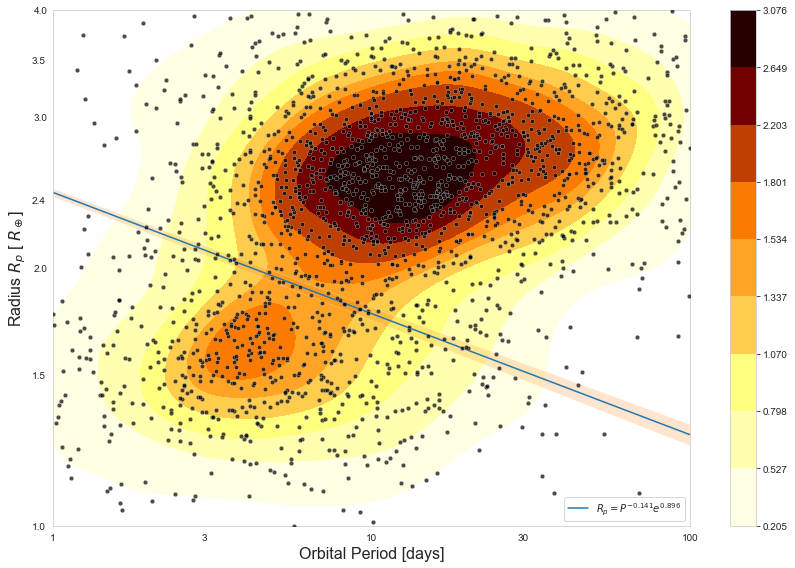

In [5]:
###  Rp vs. P - KDE & Radius Valley Slope ###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = -0.1415
m_ln_err = 0.0057
b_ln = 0.896
b_ln_err = 0.011
# Define line and error data
xrv = sort_P = np.sort(planets.P)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(1, 100)
plt.ylim(1, 4)
plt.xscale('log')
plt.yscale('log')
sns.kdeplot(data=planets, x='P', y='Rp', bw_adjust = 1, levels = 10, fill=True, cmap='afmhot_r', cbar=True)
sns.scatterplot(data=planets, x='P', y='Rp', color='black', alpha=0.7, s=20, zorder=10)
yt = [1.0, 1.5, 2.4, 3.5]
xt = [1,3,10,30,100]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
plt.xticks(xt,xt)
# Plot line with labels, axis parameters and error region
plt.plot(xrv, yrv, label='$R_p = P^{{{}}}e^{{{}}}$'.format(round(m_ln,3),round(b_ln,3)))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False) 
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, alpha=0.2)
plt.xlabel('Orbital Period [days]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.legend()
plt.tight_layout();

## Rp vs. P - KDE & Radius Valley Slope - All Slopes - Theory ###

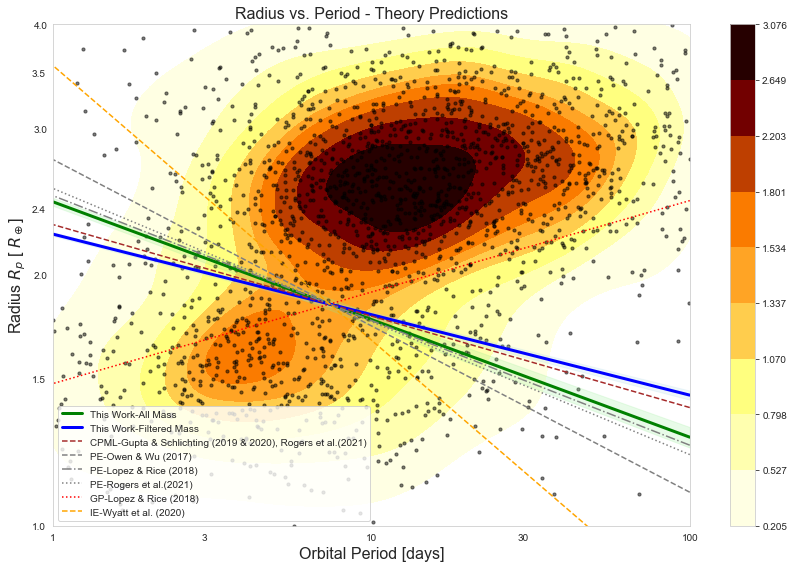

In [6]:
###  Rp vs. P - KDE & Radius Valley Slope - All Slopes - Theory ###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = -0.1415
m_ln_err = 0.0057
b_ln = 0.896
b_ln_err = 0.011
m_ln_f = -0.0968
m_ln_err_f = 0.0025
#b_ln_f = 0.7184
b_ln_err_f = 0.0051
b_ln_f = 2*(m_ln - m_ln_f) + b_ln
## Add theoretical model data with normalized intercept
m_tm1 = -0.11
b_tm1 = 2*(m_ln - m_tm1) + b_ln
m_tm2 = -0.2
b_tm2 = 2*(m_ln - m_tm2) + b_ln
m_tm3 = -0.15
b_tm3 = 2*(m_ln - m_tm3) + b_ln
m_tm4 = -0.16
b_tm4 = 2*(m_ln - m_tm4) + b_ln
m_tm5 = 0.11
b_tm5 = 2*(m_ln - m_tm5) + b_ln
m_tm6 = -0.33
b_tm6 = 2*(m_ln - m_tm6) + b_ln
# Define line and error data
xrv = sort_P = np.sort(planets.P)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
yrv_f = xrv**m_ln_f * np.exp(b_ln_f)
yrv_err_f = xrv**m_ln_f * np.exp(b_ln_f) * np.sqrt(np.log(xrv)**2 * m_ln_err_f**2 + b_ln_err_f**2)
ytm1 = xrv**m_tm1 * np.exp(b_tm1)
ytm2 = xrv**m_tm2 * np.exp(b_tm2)
ytm3 = xrv**m_tm3 * np.exp(b_tm3)
ytm4 = xrv**m_tm4 * np.exp(b_tm4)
ytm5 = xrv**m_tm5 * np.exp(b_tm5)
ytm6 = xrv**m_tm6 * np.exp(b_tm6)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(1, 100)
plt.ylim(1, 4)
plt.xscale('log', base=3)
plt.yscale('log')
sns.kdeplot(data=planets, x='P', y='Rp', fill=True, cmap='afmhot_r', cbar=True)
plt.scatter(planets.P,planets.Rp, alpha=0.5, color='black', s=10)
yt = [1.0, 1.5, 2.4, 3.5]
xt = [1,3,10,30,100]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
plt.xticks(xt,xt)
# Plot lines with labels, axis parameters and error region
plt.plot(xrv, yrv, color="green", linewidth=3, label='This Work-All Mass')
plt.plot(xrv, yrv_f, color="blue", linewidth=3, label='This Work-Filtered Mass')
plt.plot(xrv, ytm1, color="brown", linestyle="dashed", label='CPML-Gupta & Schlichting (2019 & 2020), Rogers et al.(2021)')
plt.plot(xrv, ytm2, color="grey", linestyle="dashed", label='PE-Owen & Wu (2017)')
plt.plot(xrv, ytm3, color="grey", linestyle="dashdot", label='PE-Lopez & Rice (2018)')
plt.plot(xrv, ytm4, color="grey", linestyle="dotted", label='PE-Rogers et al.(2021)')
plt.plot(xrv, ytm5, color="red", linestyle="dotted", label='GP-Lopez & Rice (2018)')
plt.plot(xrv, ytm6, color="orange", linestyle="dashed", label='IE-Wyatt et al. (2020)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False)
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, color="lightgreen", alpha=0.2)
ax.fill_between(xrv, yrv_f - yrv_err_f, yrv_f + yrv_err_f, color ="lightblue",alpha=0.2)
plt.xlabel('Orbital Period [days]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.title("Radius vs. Period - Theory Predictions",fontsize=16)
plt.legend()
plt.savefig("RvP_TP.pdf", format="pdf", bbox_inches="tight") 
plt.tight_layout();

## Rp vs. P - KDE & Radius Valley Slope - All Slopes - Observational

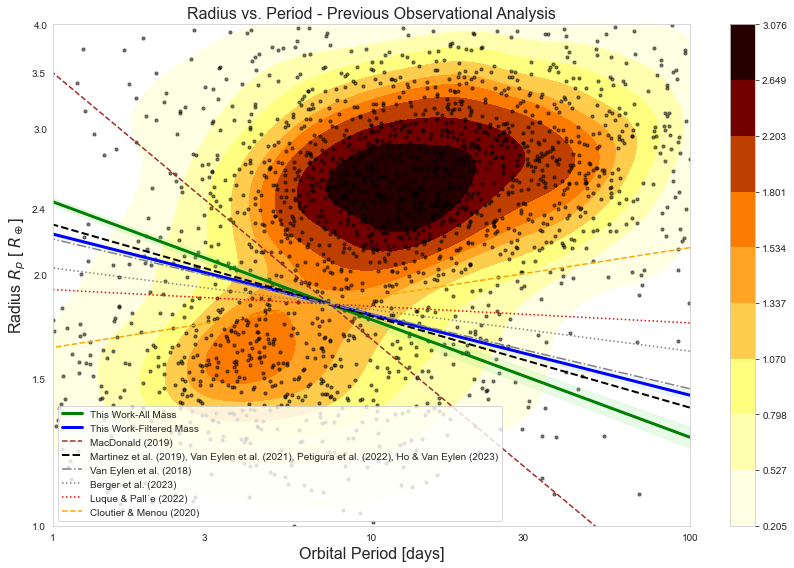

In [7]:
###  Rp vs. P - KDE & Radius Valley Slope - All Slopes - Observational ###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = -0.1415
m_ln_err = 0.0057
b_ln = 0.896
b_ln_err = 0.011
m_ln_f = -0.0968
m_ln_err_f = 0.0025
#b_ln_f = 0.7184
b_ln_err_f = 0.0051
b_ln_f = 2*(m_ln - m_ln_f) + b_ln
## Add observational results data with normalized intercept
m_or1 = -0.32
b_or1 = 2*(m_ln - m_or1) + b_ln
m_or2 = -0.11
b_or2 = 2*(m_ln - m_or2) + b_ln
m_or3 = -0.09
b_or3 = 2*(m_ln - m_or3) + b_ln
m_or4 = -0.05
b_or4 = 2*(m_ln - m_or4) + b_ln
m_or5 = -0.02
b_or5 = 2*(m_ln - m_or5) + b_ln
m_or6 = 0.06
b_or6 = 2*(m_ln - m_or6) + b_ln
# Define line and error data
xrv = sort_P = np.sort(planets.P)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
yrv_f = xrv**m_ln_f * np.exp(b_ln_f)
yrv_err_f = xrv**m_ln_f * np.exp(b_ln_f) * np.sqrt(np.log(xrv)**2 * m_ln_err_f**2 + b_ln_err_f**2)
yor1 = xrv**m_or1 * np.exp(b_or1)
yor2 = xrv**m_or2 * np.exp(b_or2)
yor3 = xrv**m_or3 * np.exp(b_or3)
yor4 = xrv**m_or4 * np.exp(b_or4)
yor5 = xrv**m_or5 * np.exp(b_or5)
yor6 = xrv**m_or6 * np.exp(b_or6)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(1, 100)
plt.ylim(1, 4)
plt.xscale('log', base=3)
plt.yscale('log')
sns.kdeplot(data=planets, x='P', y='Rp', fill=True, cmap='afmhot_r', cbar=True)
plt.scatter(planets.P,planets.Rp, alpha=0.5, color='black', s=10)
yt = [1.0, 1.5, 2.4, 3.5]
xt = [1,3,10,30,100]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
plt.xticks(xt,xt)
# Plot lines with labels, axis parameters and error region
plt.plot(xrv, yrv, color="green", linewidth=3, label='This Work-All Mass')
plt.plot(xrv, yrv_f, color="blue", linewidth=3, label='This Work-Filtered Mass')
plt.plot(xrv, yor1, color="brown", linestyle="dashed", label='MacDonald (2019)')
plt.plot(xrv, yor2, color="black", linewidth=2, linestyle="dashed", label='Martinez et al. (2019), Van Eylen et al. (2021), Petigura et al. (2022), Ho & Van Eylen (2023)')
plt.plot(xrv, yor3, color="grey", linestyle="dashdot", label='Van Eylen et al. (2018)')
plt.plot(xrv, yor4, color="grey", linestyle="dotted", label='Berger et al. (2023)')
plt.plot(xrv, yor5, color="red", linestyle="dotted", label='Luque & Pall´e (2022)')
plt.plot(xrv, yor6, color="orange", linestyle="dashed", label='Cloutier & Menou (2020)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False)
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, color="lightgreen", alpha=0.2)
ax.fill_between(xrv, yrv_f - yrv_err_f, yrv_f + yrv_err_f, color ="lightblue",alpha=0.2)
plt.xlabel('Orbital Period [days]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.title("Radius vs. Period - Previous Observational Analysis",fontsize=16)
plt.legend()
plt.savefig("RvP_POA.pdf", format="pdf", bbox_inches="tight") 
plt.tight_layout();

## Rp vs. Sp - KDE & Radius Valley Slope

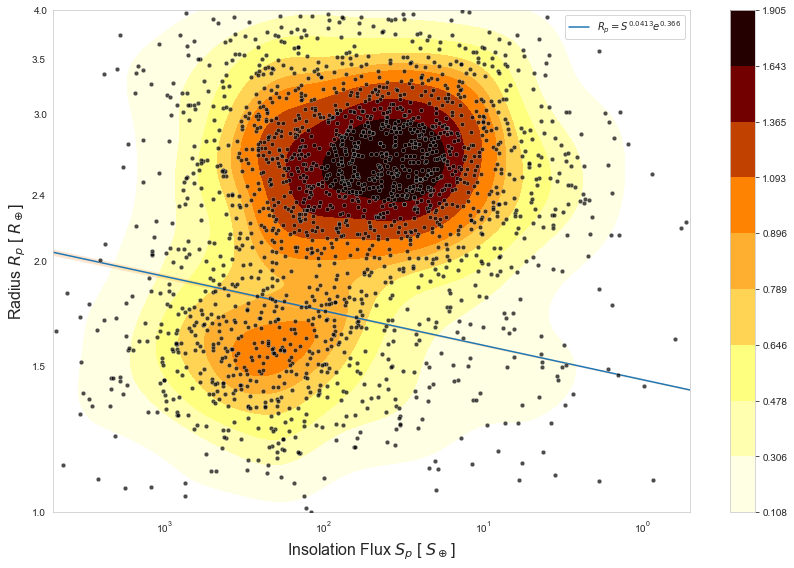

In [8]:
###  Rp vs. Sp - KDE & Radius Valley Slope ###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = 0.0413
m_ln_err = 0.001012
b_ln = 0.3657
b_ln_err = 0.002156
# Define line and error data
xrv = sort_P = np.sort(planets.Sp)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(5000, .5)
plt.ylim(1, 4)
plt.xscale('log')
plt.yscale('log')
sns.kdeplot(data=planets, x='Sp', y='Rp', fill=True, cmap='afmhot_r', cbar=True)
sns.scatterplot(data=planets, x='Sp', y='Rp', color='black', alpha=0.7, s=20, zorder=10)
yt = [1.0, 1.5, 2.4, 3.5]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
# Plot lines with labels, axis parameters and error region
plt.plot(xrv, yrv, label='$R_p = S^{{{}}}e^{{{}}}$'.format(round(m_ln,4),round(b_ln,3)))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False)
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, alpha=0.2)
plt.xlabel('Insolation Flux $S_p$ [ $S_\\oplus $]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.legend()
plt.tight_layout();

## Rp vs. Sp - KDE & Radius Valley Slope - All Slopes - Theory

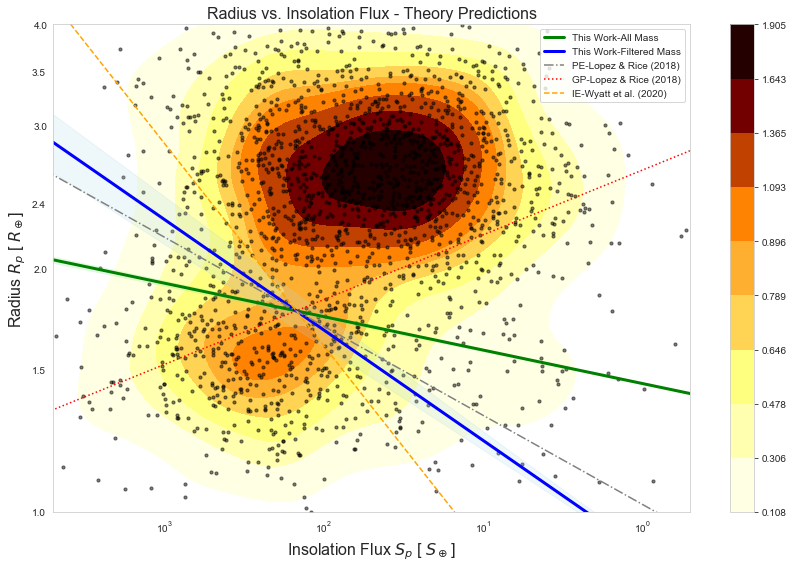

In [9]:
###  Rp vs. Sp - KDE & Radius Valley Slope - All Slopes - Theory###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = 0.0413
m_ln_err = 0.001012
b_ln = 0.3657
b_ln_err = 0.002156
m_ln_f = 0.1364
m_ln_err_f = 0.009572
#b_ln_f = 0.0994
b_ln_err_f = 0.01419
b_ln_f = 5*(m_ln - m_ln_f) + b_ln
## Add theoretical model data with normalized intercept
m_tm3 = 0.11
b_tm3 = 5*(m_ln - m_tm3) + b_ln
m_tm5 = -0.08
b_tm5 = 5*(m_ln - m_tm5) + b_ln
m_tm6 = 0.25
b_tm6 = 5*(m_ln - m_tm6) + b_ln
# Define line and error data
xrv = sort_P = np.sort(planets.Sp)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
yrv_f = xrv**m_ln_f * np.exp(b_ln_f)
yrv_err_f = xrv**m_ln_f * np.exp(b_ln_f) * np.sqrt(np.log(xrv)**2 * m_ln_err_f**2 + b_ln_err_f**2)
ytm3 = xrv**m_tm3 * np.exp(b_tm3)
ytm5 = xrv**m_tm5 * np.exp(b_tm5)
ytm6 = xrv**m_tm6 * np.exp(b_tm6)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(5000, .5)
plt.ylim(1, 4)
plt.xscale('log')
plt.yscale('log')
sns.kdeplot(data=planets, x='Sp', y='Rp', fill=True, cmap='afmhot_r', cbar=True)
plt.scatter(planets.Sp,planets.Rp, alpha=0.5, color='black', s=10)
yt = [1.0, 1.5, 2.4, 3.5]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
# Plot lines with labels, axis parameters and error region
plt.plot(xrv, yrv, color="green", linewidth=3, label='This Work-All Mass')
plt.plot(xrv, yrv_f, color="blue", linewidth=3, label='This Work-Filtered Mass')
plt.plot(xrv, ytm3, color="grey", linestyle="dashdot", label='PE-Lopez & Rice (2018)')
plt.plot(xrv, ytm5, color="red", linestyle="dotted", label='GP-Lopez & Rice (2018)')
plt.plot(xrv, ytm6, color="orange", linestyle="dashed", label='IE-Wyatt et al. (2020)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False)
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, color="lightgreen", alpha=0.2)
ax.fill_between(xrv, yrv_f - yrv_err_f, yrv_f + yrv_err_f, color ="lightblue",alpha=0.2)
plt.xlabel('Insolation Flux $S_p$ [ $S_\\oplus $]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.title("Radius vs. Insolation Flux - Theory Predictions",fontsize=16)
plt.legend()
plt.savefig("RvS_TP.pdf", format="pdf", bbox_inches="tight") 
plt.tight_layout();

## Rp vs. Sp - KDE & Radius Valley Slope - All Slopes - Observations

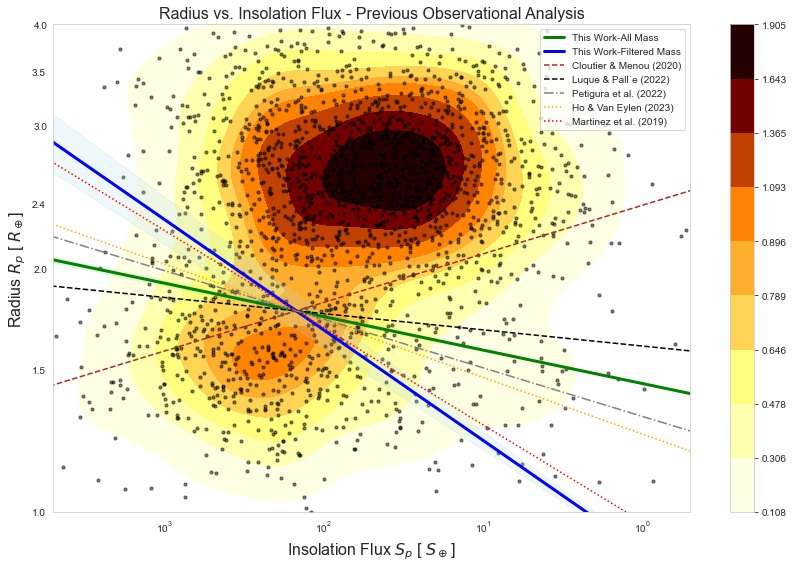

In [10]:
###  Rp vs. Sp - KDE & Radius Valley Slope - All Slopes - Observations###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = 0.0413
m_ln_err = 0.001012
b_ln = 0.3657
b_ln_err = 0.002156
m_ln_f = 0.1364
m_ln_err_f = 0.009572
#b_ln_f = 0.0994
b_ln_err_f = 0.01419
b_ln_f = 5*(m_ln - m_ln_f) + b_ln
## Add observational results data with normalized intercept
m_or1 = -0.06
b_or1 = 5*(m_ln - m_or1) + b_ln
m_or2 = 0.02
b_or2 = 5*(m_ln - m_or2) + b_ln
m_or3 = 0.06
b_or3 = 5*(m_ln - m_or3) + b_ln
m_or4 = 0.07
b_or4 = 5*(m_ln - m_or4) + b_ln
m_or5 = 0.12
b_or5 = 5*(m_ln - m_or5) + b_ln
# Define line and error data
xrv = sort_P = np.sort(planets.Sp)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
yrv_f = xrv**m_ln_f * np.exp(b_ln_f)
yrv_err_f = xrv**m_ln_f * np.exp(b_ln_f) * np.sqrt(np.log(xrv)**2 * m_ln_err_f**2 + b_ln_err_f**2)
yor1 = xrv**m_or1 * np.exp(b_or1)
yor2 = xrv**m_or2 * np.exp(b_or2)
yor3 = xrv**m_or3 * np.exp(b_or3)
yor4 = xrv**m_or4 * np.exp(b_or4)
yor5 = xrv**m_or5 * np.exp(b_or5)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(5000, .5)
plt.ylim(1, 4)
plt.xscale('log')
plt.yscale('log')
sns.kdeplot(data=planets, x='Sp', y='Rp', fill=True, cmap='afmhot_r', cbar=True)
plt.scatter(planets.Sp,planets.Rp, alpha=0.5, color='black', s=10)
yt = [1.0, 1.5, 2.4, 3.5]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
# Plot lines with labels, axis parameters and error region
plt.plot(xrv, yrv, color="green", linewidth=3, label='This Work-All Mass')
plt.plot(xrv, yrv_f, color="blue", linewidth=3, label='This Work-Filtered Mass')
plt.plot(xrv, yor1, color="brown", linestyle="dashed", label='Cloutier & Menou (2020)')
plt.plot(xrv, yor2, color="black", linestyle="dashed", label='Luque & Pall´e (2022)')
plt.plot(xrv, yor3, color="grey", linestyle="dashdot", label='Petigura et al. (2022)')
plt.plot(xrv, yor4, color="orange", linestyle="dotted", label='Ho & Van Eylen (2023)')
plt.plot(xrv, yor5, color="red", linestyle="dotted", label='Martinez et al. (2019)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False)
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, color="lightgreen", alpha=0.2)
ax.fill_between(xrv, yrv_f - yrv_err_f, yrv_f + yrv_err_f, color ="lightblue",alpha=0.2)
plt.xlabel('Insolation Flux $S_p$ [ $S_\\oplus $]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.title("Radius vs. Insolation Flux - Previous Observational Analysis",fontsize=16)
plt.legend()
plt.savefig("RvS_POA.pdf", format="pdf", bbox_inches="tight") 
plt.tight_layout();

## Rp vs. Ms - KDE & Radius Valley Slope

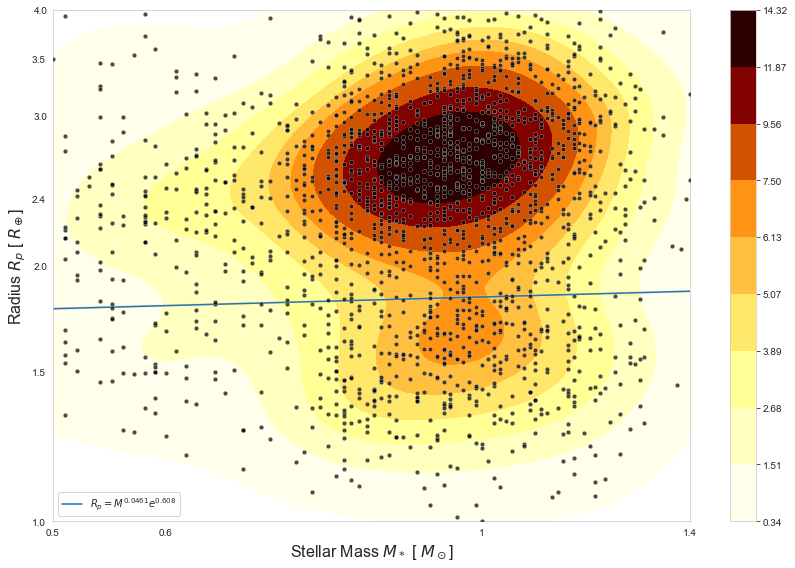

In [11]:
###  Rp vs. Ms - KDE & Radius Valley Slope ###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = 0.0461
m_ln_err = 0.003240
b_ln = 0.608
b_ln_err = 0.003177
# Define line and error data
xrv = sort_P = np.sort(planets.Ms)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(.5, 1.4)
plt.ylim(1, 4)
plt.xscale('log')
plt.yscale('log')
sns.kdeplot(data=planets, x='Ms', y='Rp', fill=True, cmap='afmhot_r', cbar=True)
sns.scatterplot(data=planets, x='Ms', y='Rp', color='black', alpha=0.7, s=20, zorder=10)
yt = [1.0, 1.5, 2.4, 3.5]
xt = [.5,.6,1,1.4]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
plt.xticks(xt,xt)
# Plot lines with labels, axis parameters and error region
plt.plot(xrv, yrv, label='$R_p = M^{{{}}}e^{{{}}}$'.format(round(m_ln,5),round(b_ln,3)))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False)
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, alpha=0.2)
plt.xlabel('Stellar Mass $M_*$ [ $M_\\odot $]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.legend()
plt.tight_layout();

## Rp vs. Ms - KDE & Radius Valley Slope - All Slopes - Theory

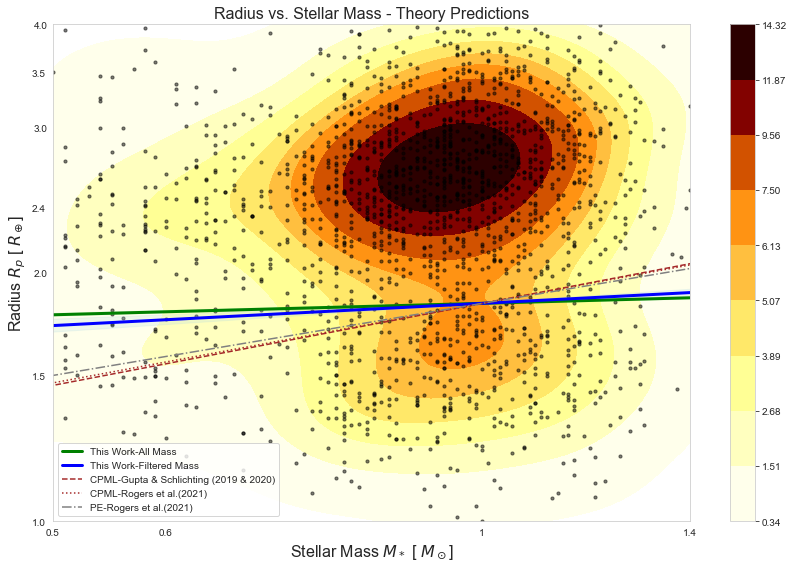

In [12]:
###  Rp vs. Ms - KDE & Radius Valley Slope - All Slopes - Theory###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = 0.0461
m_ln_err = 0.003240
b_ln = 0.608
b_ln_err = 0.003177
m_ln_f = 0.0895
m_ln_err_f = 0.02573
#b_ln_f = 0.625
b_ln_err_f = 0.003205
b_ln_f = .001*(m_ln - m_ln_f) + b_ln
## Add theoretical model data with normalized intercept
m_tm1 = 0.33
b_tm1 = .001*(m_ln - m_tm1) + b_ln
m_tm2 = 0.32
b_tm2 = .001*(m_ln - m_tm2) + b_ln
m_tm3 = 0.29
b_tm3 = .001*(m_ln - m_tm3) + b_ln
# Define line and error data
xrv = sort_P = np.sort(planets.Ms)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
yrv_f = xrv**m_ln_f * np.exp(b_ln_f)
yrv_err_f = xrv**m_ln_f * np.exp(b_ln_f) * np.sqrt(np.log(xrv)**2 * m_ln_err_f**2 + b_ln_err_f**2)
ytm1 = xrv**m_tm1 * np.exp(b_tm1)
ytm2 = xrv**m_tm2 * np.exp(b_tm2)
ytm3 = xrv**m_tm3 * np.exp(b_tm3)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(.5, 1.4)
plt.ylim(1, 4)
plt.xscale('log')
plt.yscale('log')
sns.kdeplot(data=planets, x='Ms', y='Rp', fill=True, cmap='afmhot_r', cbar=True)
plt.scatter(planets.Ms,planets.Rp, alpha=0.5, color='black', s=10)
yt = [1.0, 1.5, 2.4, 3.5]
xt = [.5,.6,1,1.4]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
plt.xticks(xt,xt)
# Plot lines with labels, axis parameters and error region
plt.plot(xrv, yrv, color="green", linewidth=3, label='This Work-All Mass')
plt.plot(xrv, yrv_f, color="blue", linewidth=3, label='This Work-Filtered Mass')
plt.plot(xrv, ytm1, color="brown", linestyle="dashed", label='CPML-Gupta & Schlichting (2019 & 2020)')
plt.plot(xrv, ytm2, color="brown", linestyle="dotted", label='CPML-Rogers et al.(2021)')
plt.plot(xrv, ytm3, color="grey", linestyle="dashdot", label='PE-Rogers et al.(2021)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False)
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, color="lightgreen", alpha=0.2)
ax.fill_between(xrv, yrv_f - yrv_err_f, yrv_f + yrv_err_f, color ="lightblue",alpha=0.2)
plt.xlabel('Stellar Mass $M_*$ [ $M_\\odot $]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.title("Radius vs. Stellar Mass - Theory Predictions",fontsize=16)
plt.legend()
plt.savefig("RvM_TP.pdf", format="pdf", bbox_inches="tight") 
plt.tight_layout();

## Rp vs. Ms - KDE & Radius Valley Slope - All Slopes - Oberservations

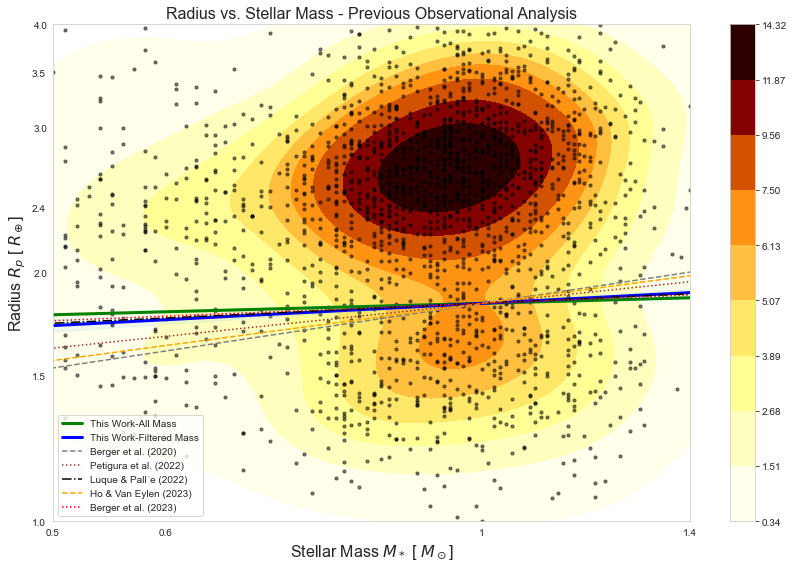

In [14]:
###  Rp vs. Ms - KDE & Radius Valley Slope - All Slopes - Oberservations ###
# Copy slope, intercept and error data from RV_Slope notebooks here
m_ln = 0.0461
m_ln_err = 0.003240
b_ln = 0.608
b_ln_err = 0.003177
m_ln_f = 0.0895
m_ln_err_f = 0.02573
#b_ln_f = 0.625
b_ln_err_f = 0.003205
b_ln_f = .001*(m_ln - m_ln_f) + b_ln
## Add observational results data with normalized intercept
m_or1 = 0.26
b_or1 = .001*(m_ln - m_or1) + b_ln
m_or2 = 0.18
b_or2 = .001*(m_ln - m_or2) + b_ln
m_or3 = 0.08
b_or3 = .001*(m_ln - m_or3) + b_ln
m_or4 = 0.23
b_or4 = .001*(m_ln - m_or4) + b_ln
m_or5 = 0.07
b_or5 = .001*(m_ln - m_or5) + b_ln
# Define line and error data
xrv = sort_P = np.sort(planets.Ms)[::-1]
yrv = xrv**m_ln * np.exp(b_ln)
yrv_err = xrv**m_ln * np.exp(b_ln) * np.sqrt(np.log(xrv)**2 * m_ln_err**2 + b_ln_err**2)
yrv_f = xrv**m_ln_f * np.exp(b_ln_f)
yrv_err_f = xrv**m_ln_f * np.exp(b_ln_f) * np.sqrt(np.log(xrv)**2 * m_ln_err_f**2 + b_ln_err_f**2)
yor1 = xrv**m_or1 * np.exp(b_or1)
yor2 = xrv**m_or2 * np.exp(b_or2)
yor3 = xrv**m_or3 * np.exp(b_or3)
yor4 = xrv**m_or4 * np.exp(b_or4)
yor5 = xrv**m_or5 * np.exp(b_or5)
# Plot KDE contour and planet scatter data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(.5, 1.4)
plt.ylim(1, 4)
plt.xscale('log')
plt.yscale('log')
sns.kdeplot(data=planets, x='Ms', y='Rp', fill=True, cmap='afmhot_r', cbar=True)
plt.scatter(planets.Ms,planets.Rp, alpha=0.5, color='black', s=10)
yt = [1.0, 1.5, 2.4, 3.5]
xt = [.5,.6,1,1.4]
plt.yticks(yt, ["1.0", "1.5", "2.4", "3.5"])
plt.xticks(xt,xt)
# Plot lines with labels, axis parameters and error region
plt.plot(xrv, yrv, color="green", linewidth=3, label='This Work-All Mass')
plt.plot(xrv, yrv_f, color="blue", linewidth=3, label='This Work-Filtered Mass')
plt.plot(xrv, yor1, color="grey", linestyle="dashed", label='Berger et al. (2020)')
plt.plot(xrv, yor2, color="brown", linestyle="dotted", label='Petigura et al. (2022)')
plt.plot(xrv, yor3, color="black", linestyle="dashdot", label='Luque & Pall´e (2022)')
plt.plot(xrv, yor4, color="orange", linestyle="dashed", label='Ho & Van Eylen (2023)')
plt.plot(xrv, yor5, color="red", linestyle="dotted", label='Berger et al. (2023)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=False)
ax.fill_between(xrv, yrv - yrv_err, yrv + yrv_err, color="lightgreen", alpha=0.2)
ax.fill_between(xrv, yrv_f - yrv_err_f, yrv_f + yrv_err_f, color ="lightblue",alpha=0.2)
plt.xlabel('Stellar Mass $M_*$ [ $M_\\odot $]', fontsize=16)
plt.ylabel('Radius $R_p$ [ $R_\\oplus $]', fontsize=16)
plt.title("Radius vs. Stellar Mass - Previous Observational Analysis",fontsize=16)
plt.legend()
plt.savefig("RvM_POA.pdf", format="pdf", bbox_inches="tight") 
plt.tight_layout();